In [26]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
#cloudtop read in data

cloudbubf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_BubFull.csv')
cloudbubh = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_BubHalf.csv')
cloudcarpf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_CarpFull.csv')
cloudcarph = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_CarpHalf.csv')

cloudhtBF = cloudbubf['Height']
cloudareaBF = cloudbubf['Area']

cloudhtBH = cloudbubh['Height']
cloudareaBH = cloudbubh['Area']

cloudhtCF = cloudcarpf['Height']
cloudareaCF = cloudcarpf['Area']

cloudhtCH = cloudcarph['Height']
cloudareaCH = cloudcarph['Area']


levels1 = 76
levels2 = 76
levels4 = 200 #number of how many rows to skip

In [28]:
#carpfull cloudtop create area and cloudtop height arrays
height1 = {}
area1 = {}
counter = -1
for i in np.arange(0,cloudcarpf['Height'][:].shape[0],levels1+1):
    counter = counter + 1
    h1 = np.asarray(cloudhtCF[i:i+levels1-1],dtype=float)
    a1 = np.asarray(cloudareaCF[i:i+levels1-1],dtype=float)
    height1[counter] = h1
    area1[counter] = a1

In [29]:
#carphalf cloudtop create area and cloudtop height arrays
height2 = {}
area2 = {}
counter = -1
for i in np.arange(0,cloudcarph['Height'][:].shape[0],levels1+1):
    counter = counter + 1
    h2 = np.asarray(cloudhtCH[i:i+levels1-1],dtype=float)
    a2 = np.asarray(cloudareaCH[i:i+levels1-1],dtype=float)
    height2[counter] = h2
    area2[counter] = a2

In [30]:
#fullbub cloudtop create area and cloudtop height
height3 = {}
area3 = {}
counter = -1
for i in np.arange(0,cloudbubf['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h3 = np.asarray(cloudhtBF[i:i+levels2-1],dtype=float)
    a3 = np.asarray(cloudareaBF[i:i+levels2-1],dtype=float)
    height3[counter] = h3
    area3[counter] = a3

In [31]:
#halfbub cloudtop create area and cloudtop height
height4 = {}
area4 = {}
counter = -1
for i in np.arange(0,cloudbubh['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h4 = np.asarray(cloudhtBH[i:i+levels2-1],dtype=float)
    a4 = np.asarray(cloudareaBH[i:i+levels2-1],dtype=float)
    height4[counter] = h4
    area4[counter] = a4

In [32]:
#carpfull cloudtop
cloudtop1=np.zeros(len(height1))
for i in np.arange(0,len(height1)):
    trial1 = area1[i]
    trial2 = height1[i]
    trial1[trial1 ==0] = np.nan
    ind1 = np.where(trial1 == np.nanmin(trial1))
    if len(ind1[0]) == 0:
        cloudtop1[i] = 0.0
    elif len(ind1[0]) == 1:
        cloudtop1[i] = trial2[ind1[0]]
    elif len(ind1[0]) > 1:
        cloudtop1[i] = trial2[ind1[0][len(ind1)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [33]:
#carphalf cloudtop
cloudtop2=np.zeros(len(height2))
for i in np.arange(0,len(height2)):
    trial3 = area2[i]
    trial4 = height2[i]
    trial3[trial3 ==0] = np.nan
    ind2 = np.where(trial3 == np.nanmin(trial3))
    if len(ind2[0]) == 0:
        cloudtop2[i] = 0.0
    elif len(ind2[0]) == 1:
        cloudtop2[i] = trial4[ind2[0]]
    elif len(ind2[0]) > 1:
        cloudtop2[i] = trial4[ind2[0][len(ind2)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [34]:
#halfbub cloudtop
cloudtop3=np.zeros(len(height3))
for i in np.arange(0,len(height3)):
    trial5 = area3[i]
    trial6 = height3[i]
    trial5[trial5 ==0] = np.nan
    ind3 = np.where(trial5 == np.nanmin(trial5))
    if len(ind3[0]) == 0:
        cloudtop3[i] = 0.0
    elif len(ind3[0]) == 1:
        cloudtop3[i] = trial6[ind3[0]]
    elif len(ind3[0]) > 1:
        cloudtop3[i] = trial6[ind3[0][len(ind3)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [35]:
#fullbub cloudtop
cloudtop4=np.zeros(len(height4))
for i in np.arange(0,len(height4)):
    trial7 = area4[i]
    trial8 = height4[i]
    trial7[trial7 ==0] = np.nan
    ind4 = np.where(trial7 == np.nanmin(trial7))
    if len(ind4[0]) == 0:
        cloudtop4[i] = 0.0
    elif len(ind4[0]) == 1:
        cloudtop4[i] = trial8[ind4[0]]
    elif len(ind4[0]) > 1:
        cloudtop4[i] = trial8[ind4[0][len(ind4)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


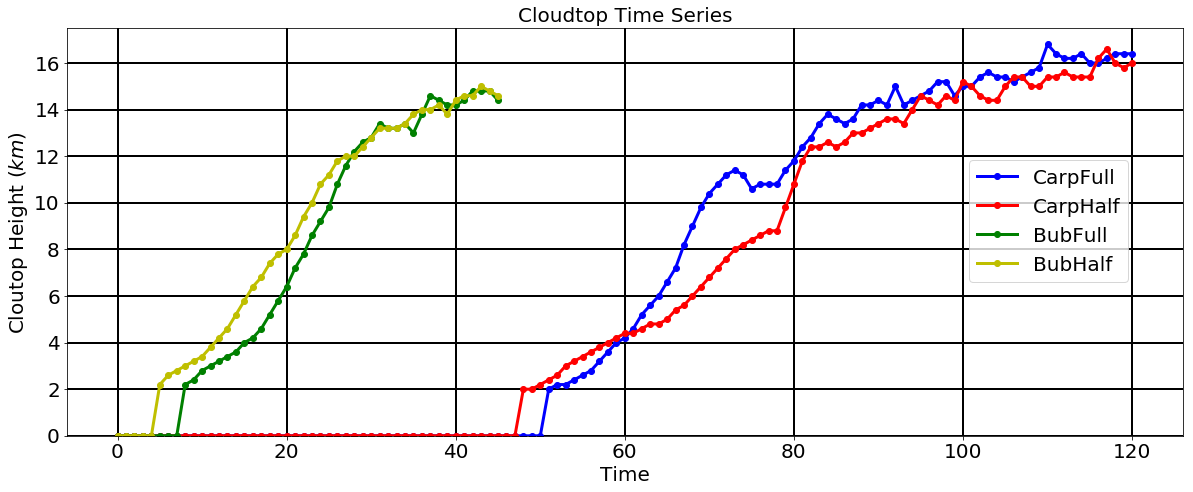

In [52]:
#Cloudtop Time series
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(20, 7.5))

ax = plt.plot(cloudtop1,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(cloudtop2,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(cloudtop3,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(cloudtop4,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Cloudtop Time Series', fontsize=20)
# plt.xlim(0,0.3*10**12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,17.5)
plt.legend(bbox_to_anchor=(.96, .7), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)